In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import brier_score_loss
import numpy as np

FileNotFoundError: Could not find module 'C:\Users\VEDIT\anaconda3\lib\site-packages\scipy\.libs\libbanded5x.EHDKC2XVYTQQ5MALRS6XN2CUSS6SRL6P.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [5]:
n_samples = 50000
n_bins = 3 # use 3 bins for calibration_curve as we have 3 clusters here
# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False,
random_state=42)
y[:n_samples // 2] = 0
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

In [7]:
X_train,X_test,y_train,y_test,sw_train,sw_test = train_test_split(X,y,sample_weight,test_size = .9,random_state = 0)

In [26]:
clf = GaussianNB()
clf.fit(X_train,y_train)
g_pred = clf.predict_proba(X_test)[:,1]


In [40]:
isotonic = CalibratedClassifierCV(clf,cv = 10,method = 'isotonic')
isotonic.fit(X_train,y_train,sample_weight = sw_train)
is_pred = isotonic.predict_proba(X_test)[:,1]

In [41]:
sigmoid = CalibratedClassifierCV(clf,cv = 10,method = 'sigmoid')
sigmoid.fit(X_train,y_train,sw_train)
si_pred = sigmoid.predict_proba(X_test)[:,1]

In [45]:
print("brier score for gaussian nb")
brier_score_g = brier_score_loss(y_test,g_pred,sample_weight = sw_test)
print(brier_score_g)
print("brier score for isotonic and gaussian")
brier_score_is = brier_score_loss(y_test,is_pred,sample_weight = sw_test)
print(brier_score_is)
print("brier score for sigmoid and gaussian")
brier_score_si = brier_score_loss(y_test,si_pred,sample_weight = sw_test)
print(brier_score_si)

brier score for gaussian nb
0.10503868275949739
brier score for isotonic and gaussian
0.08560354720641235
brier score for sigmoid and gaussian
0.10867552220133052


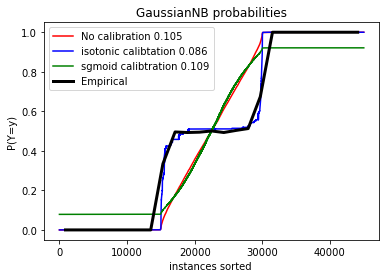

In [62]:
plt.figure()
order = np.lexsort((g_pred, ))
plt.plot(g_pred[order],'r',label = "No calibration %1.3f"%brier_score_g)
plt.plot(is_pred[order],'b',label = "isotonic calibtation %1.3f"%brier_score_is)
plt.plot(si_pred[order],'g',label = "sgmoid calibtration %1.3f"%brier_score_si)
plt.plot(np.linspace(0, y_test.size, 51)[1::2],y_test[order].reshape(25, -1).mean(1),'k', linewidth=3, label=r'Empirical')
plt.title("GaussianNB probabilities")
plt.ylabel("P(Y=y)")
plt.xlabel("instances sorted ")
plt.legend(loc = "best")

array([0, 0, 0, ..., 1, 1, 1])

array([0.37454012, 0.95071431, 0.73199394, ..., 0.74899508, 0.52101091,
       0.86170671])

array([0.59365258, 0.54600675, 0.67694313, ..., 0.46873353, 0.22806932,
       0.34093334])

In [34]:
sw_train

array([0.82445159, 0.29707696, 0.53266459, ..., 0.72622789, 0.01581413,
       0.05784445])

In [35]:
X_train.shape

(5000, 2)

In [36]:
sw_train.shape

(5000,)